# csv데이터불러오기

In [2]:
import os
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy
import csv
import math

In [18]:
# csv파일 불러와서 ppg_data로 반환
def load_data(path):
    f = open(path, 'r', encoding='utf-8')
    rdr = csv.reader(f)
    for line in rdr:
        ppg_data=line
    f.close()
    return ppg_data    

In [1]:
import csv
# cppg불러오기
f = open('D:\\prlab\\ysg\\HRV\\data\\ppg_signal\\cppg\\cppg3.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    cppg_data=line
    print(line)
print(type(cppg_data))
f.close()   

['2485', '2492', '2495', '2496', '2496', '2493', '2489', '2482', '2474', '2463', '2452', '2439', '2426', '2412', '2399', '2385', '2369', '2355', '2342', '2328', '2316', '2306', '2295', '2287', '2280', '2273', '2268', '2263', '2259', '2257', '2254', '2254', '2253', '2253', '2253', '2254', '2256', '2257', '2257', '2257', '2256', '2255', '2253', '2249', '2245', '2240', '2234', '2228', '2222', '2214', '2208', '2202', '2195', '2190', '2185', '2180', '2177', '2174', '2170', '2169', '2167', '2165', '2164', '2162', '2159', '2157', '2156', '2154', '2152', '2150', '2150', '2148', '2147', '2147', '2144', '2143', '2139', '2135', '2132', '2126', '2121', '2115', '2110', '2104', '2099', '2092', '2086', '2080', '2075', '2070', '2064', '2060', '2055', '2049', '2043', '2038', '2031', '2024', '2017', '2010', '2002', '1995', '1989', '1983', '1977', '1972', '1967', '1961', '1957', '1953', '1948', '1944', '1940', '1936', '1933', '1928', '1925', '1922', '1918', '1915', '1912', '1910', '1909', '1908', '1908',

In [3]:
import csv
# rppg불러오기
f = open('D:\\prlab\\ysg\\HRV\\data\\ppg_signal\\rppg2.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    rppg_data=line
    print(line)
print(type(rppg_data))
f.close()   

['0.00023785544029657723', '0.010908239759196388', '0.019223177363379983', '0.02363829948899208', '0.02388186831158944', '0.020887402596930407', '0.016267146597719693', '0.011609648152024258', '0.007936260825904748', '0.0055228972867135285', '0.004077979398921407', '0.003098278718058443', '0.0021847481837425674', '0.0011837724533998583', '0.00015013893804850277', '-0.0007790996768462788', '-0.0014977156249536142', '-0.0019776490975439032', '-0.002259230445558324', '-0.0024233596657388893', '-0.002574182538405783', '-0.0028301522497467847', '-0.0033024688325360967', '-0.004050637637172499', '-0.005034591504262881', '-0.006100928458447346', '-0.007025352682891239', '-0.007594057725051358', '-0.0076776870521025956', '-0.007258327438676142', '-0.00640529102945449', '-0.005227919047547295', '-0.0038390006467870653', '-0.0023427576695540936', '-0.0008378638346359733', '0.0005823274588724616', '0.0018406359185602485', '0.0028909696682796974', '0.003723553859988819', '0.004353528900989268', '0

# 데이터 정규화 0~1

In [3]:
from sklearn.preprocessing import MinMaxScaler

def normalization(ppg_data):
    ppg_data=np.array(ppg_data)
    # MinMaxScaler객체 생성
    scaler = MinMaxScaler()
    # MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
    scaler.fit(ppg_data.reshape(len(ppg_data),1))
    ppg_scaled = scaler.transform(ppg_data.reshape(len(ppg_data),1))
    #plt.plot(ppg_scaled)
    
    return ppg_scaled.reshape(len(ppg_data))

# list를 numpy array로
cppg_data=np.array(cppg_data)
# rppg_data=np.array(rppg_data)
cppg_scaled=normalization(cppg_data)
# rppg_scaled=normalization(rppg_data)

# peak detection

In [21]:
# peak 찾는 함수(amplitude)
def detect_peak(hrdata,distance,i):
    point=scipy.signal.find_peaks(hrdata,distance=distance)
#     print(point[0])
# point[0]가 peak의 x좌표 hrdata[point[0]]이 peak의 y좌표
    plt.subplot(5,2,i+1)
    plt.scatter(point[0],hrdata[point[0]])
    plt.plot(hrdata)
    plt.axis([500, 2000,0,1])
    peak=np.zeros(len(point[0]))
    for i in range(len(point[0])):
        peak[i]=(hrdata[point[0][i]])
#     print(peak)
# peak = peak 값 (y축값), point[0] = peak의 x위치
    return(peak,point[0])
# detect_peak(hrdata)

91835
(91835,)


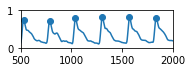

In [23]:
# cppg_data=np.array(cppg_data)
# rppg_data=np.array(rppg_data)
print(len(cppg_data))
#print(len(rppg_data))
print(cppg_scaled.shape)
#print(rppg_scaled.shape)
cppg_peaks,cppg_points= detect_peak(cppg_scaled,200,1) # peak의 y값과 x값 반환 , 100

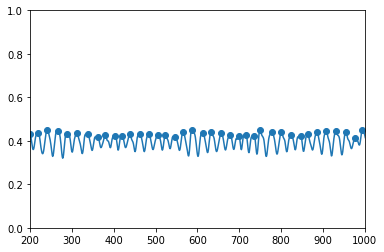

In [50]:
rppg_peaks,rppg_points= detect_peak(rppg_scaled)  # peak의 y값과 x값 반환 , 12 8

In [51]:
print(len(cppg_peaks))
print(len(rppg_peaks))
print(len(cppg_points))
print(len(rppg_points))  # peak개수 동일해지게끔 자동화함수만들기

509
511
509
511


In [28]:
#heartpy로 peak검출
import heartpy as hp
data = hp.get_data('D:\\prlab\\ysg\\HRV\\data\\ppg_signal\\cppg\\cppg11.csv')

working_data, measures = hp.process(cppg_scaled, 30)
hp.plotter(working_data, measures)

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


['cppg1.csv', 'cppg10.csv', 'cppg2.csv', 'cppg3.csv', 'cppg4.csv', 'cppg5.csv', 'cppg6.csv', 'cppg7.csv', 'cppg8.csv', 'cppg9.csv']
file_name cppg1.csv
file_name cppg10.csv
file_name cppg2.csv
file_name cppg3.csv
file_name cppg4.csv
file_name cppg5.csv
file_name cppg6.csv
file_name cppg7.csv
file_name cppg8.csv
file_name cppg9.csv


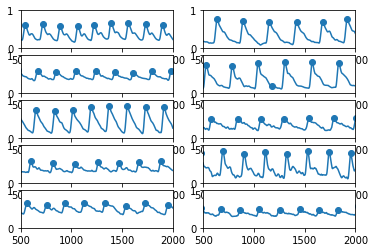

In [26]:
# 파일 한번에 돌리기.
import os
def main(c_or_r):
    if c_or_r ==0:
        filepath="D:\\prlab\\ysg\\HRV\\data\\ppg_signal\\cppg"
        filelist=os.listdir(filepath)
        print(filelist)
        for i in range (len(filelist)):
            print("file_name",filelist[i])
            path=filepath+'\\'+filelist[i]
            cppg_data=load_data(path) # 1. ppg data 하나씩 load
            cppg_scaled=normalization(cppg_data) # 2. 정규화 0~1
            cppg_peak_y,cppg_peak_x=detect_peak(cppg_scaled,130,i)#peak detect
    else :
        filepath="D:\\prlab\\ysg\\HRV\\data\\ppg_signal\\rppg"
        filelist=os.listdir(filepath)
        print(filelist)
        for i in range (len(filelist)):
            path=filepath+'\\'+filelist[i]
main(0)

<class 'list'>
91707
(91707,)


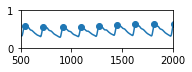

In [27]:
# 파일 하나씩 돌리기

import csv
# cppg불러오기
f = open('D:\\prlab\\ysg\\HRV\\data\\ppg_signal\\cppg\\cppg11.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    cppg_data=line
    #print(line)
print(type(cppg_data))
f.close()   

# list를 numpy array로
cppg_data=np.array(cppg_data)
rppg_data=np.array(rppg_data)
cppg_scaled=normalization(cppg_data)
rppg_scaled=normalization(rppg_data)
cppg_peaks,cppg_points= detect_peak(cppg_scaled,100,1) # peak의 y값과 x값 반환 , 100

# RR-interval 구하기

In [52]:
# print(cppg_points.shape)
# print(rppg_points.shape)
def length(x1,y1,x2,y2):
    return math.sqrt(math.pow(x2-x1,2)+math.pow(y2-y1,2))

def cal_hrv(peak_y,peak_x):
    hrv=np.zeros(len(peak_x)-1)
    print("hrv_shape:", hrv.shape)
    for i in range (len(peak_x)-1):
        peak_dist= length(peak_x[i],peak_y[i],peak_x[i+1],peak_y[i+1])
#         print(peak_dist)
        hrv[i]=peak_dist
    print(hrv)
    return hrv

cppg_hrv=cal_hrv(cppg_peaks,cppg_points)
rppg_hrv=cal_hrv(rppg_peaks,rppg_points)


print(cppg_points.shape)#peak의 x좌표
print(cppg_peaks.shape)#peak의 y좌표
length(cppg_points[0],cppg_peaks[0],cppg_points[1],cppg_peaks[1])

hrv_shape: (508,)
[180.00000055 190.00000146 193.00000023 183.0000011  195.00000098
 194.00000074 189.00000165 181.00000008 182.00000321 194.00000041
 198.00000108 201.00000138 196.00000001 204.00000006 199.00000007
 188.00000064 177.00000001 164.00000076 160.00000052 174.00000088
 193.00000031 184.00000286 177.00000145 168.00000002 178.00000013
 188.00000035 198.00000007 197.00000021 192.00000635 200.00000101
 139.00000929 175.00000362 154.00001029 163.00000068 203.00000216
 199.00000237 201.00002194 172.00000157 160.00000341 193.00000031
 188.0000003  183.00001121 220.         204.00000194 167.00000027
 181.00000003 166.00000352 205.00000002 185.00000016 175.00000016
 141.00000007 188.00000474 163.00000706 185.00000255 187.00000167
 174.00000505 150.00000051 185.00000161 164.00000073 162.00000139
 166.00000086 152.00000225 148.00000054 174.00000021 169.0000016
 196.00000008 240.00000508 178.00000008 190.00000001 183.0000033
 159.00000053 154.00000532 146.00000875 204.00000029 211.000

180.00000055008795

# hrv feature

In [53]:
from hrvanalysis import get_frequency_domain_features
cppg_frequency_features = get_frequency_domain_features(cppg_hrv)
rppg_frequency_features = get_frequency_domain_features(rppg_hrv)

print("cppg:",cppg_frequency_features)
print("rppg:",rppg_frequency_features)


cppg: {'lf': 45.79238640898639, 'hf': 69.37915524743643, 'lf_hf_ratio': 0.660030901870608, 'lfnu': 39.76015754446807, 'hfnu': 60.23984245553192, 'total_power': 136.3851235221748, 'vlf': 21.21358186575197}
rppg: {'lf': 0.08553989713063168, 'hf': 0.086581221825979, 'lf_hf_ratio': 0.9879728574697144, 'lfnu': 49.69750234554023, 'hfnu': 50.30249765445976, 'total_power': 0.18736122172144498, 'vlf': 0.015240102764834307}


C:\Users\ysk00\Anaconda3\envs\hrv\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 256 is greater than input length  = 76, using nperseg = 76
  .format(nperseg, input_length))


In [25]:
from hrvanalysis import get_time_domain_features
cppg_time_features = get_time_domain_features(cppg_hrv)
rppg_time_features = get_time_domain_features(rppg_hrv)

print(cppg_time_features)
print(rppg_time_features)

{'mean_nni': -1.6451612903225807, 'sdnn': 310.06714846810166, 'sdsd': 496.28430919741515, 'nni_50': 26, 'pnni_50': 83.87096774193549, 'nni_20': 30, 'pnni_20': 96.7741935483871, 'rmssd': 498.09791540753645, 'median_nni': -4.0, 'range_nni': 1282.0, 'cvsd': -302.7653995614437, 'cvnni': -188.47218828453236, 'mean_hr': inf, 'max_hr': inf, 'min_hr': -15000.0, 'std_hr': nan}
{'mean_nni': 0.00022113732099999999, 'sdnn': 0.0022912252957931816, 'sdsd': 0.00373137160954352, 'nni_50': 0, 'pnni_50': 0.0, 'nni_20': 0, 'pnni_20': 0.0, 'rmssd': 0.003737334586339353, 'median_nni': -0.00046133862500000004, 'range_nni': 0.01066548409, 'cvsd': 16.90051489019962, 'cvnni': 10.361097283046048, 'mean_hr': -40016299.26323609, 'max_hr': 66030508.93443961, 'min_hr': -375531729.45818037, 'std_hr': 92022004.73403198}


# csv로 기록

In [69]:
cppg_frequency_features['name']="soeui"
print(cppg_frequency_features.values())
f = open('D:\\prlab\\ysg\\HRV\\data\\hrv_feature\\cppg.csv','w', newline='')
# fieldnames=cppg_frequency_features.keys()
# print(fieldnames)
wr = csv.writer(f)
wr.writerow(cppg_frequency_features.keys()) 
wr.writerow(cppg_frequency_features.values()) 
f.close()

dict_values([0.10822306266329913, 0.50597153800256, 0.21389160167098484, 17.62032140073726, 82.37967859926273, 0.6211251835636167, 0.006930582897757498, 'soeui'])


In [ ]:
rppg_frequency_features['name']="soeui"
print(cppg_frequency_features.values())
f = open('D:\\prlab\\ysg\\HRV\\data\\hrv_feature\\rppg.csv','w', newline='')
# fieldnames=cppg_frequency_features.keys()
# print(fieldnames)
wr = csv.writer(f)
wr.writerow(rppg_frequency_features.keys()) 
wr.writerow(rppg_frequency_features.values()) 
f.close()